In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Learning Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import seaborn as sns
from collections import Counter, defaultdict


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/envs/prostate/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Load Dataset and look at it

In [2]:
data = pd.read_csv("newnew8.csv")

In [4]:
print(data.head())

  study_id  prostate_vol  lesion_count   adc_kurt      adc_10p     t2w_min  \
0     M003     48.993125             3  -0.264728   810.439978  370.600006   
1     M004     26.050920             2  -0.303378   842.470593  204.880005   
2     M005     92.462125             4  -0.567523   939.823853  255.699677   
3     M006     32.327750             4  24.488103  1044.649414  280.094452   
4     M007    116.396000             7  -0.445859   990.146851  279.300110   

   hbv_skew    psa  pirads_max  outcome  
0 -0.859162   5.21           4        0  
1  0.384661   1.61           0        0  
2  0.125272  14.60           0        0  
3 -1.067874   1.60           2        0  
4  0.074743   8.28           2        0  


In [5]:
#remove user id from data frame
df = data.drop('study_id', axis = 1)
df.head()
#split train test 
from sklearn.model_selection import train_test_split
X = df
y = df.outcome.values.astype('int32')
X.drop(['outcome'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, test_size=0.34, random_state=0)

In [6]:
l_model = LogisticRegression(solver='lbfgs')
logit = l_model.fit(X_train, y_train)
predictions = logit.predict(X_test)
#find roc auc curve
logisticRegressionAUC_1 = metrics.roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
fpr_logit, tpr_logit, threshold_logit = metrics.roc_curve(y_test, logit.predict_proba(X_test)[:,1])
print(logisticRegressionAUC_1)

0.8137755102040817


/opt/anaconda3/envs/prostate/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
def main(num, X, y):
    logistic_regression_results = []
    l_tpr = []
    l_fpr = []
    random_forest_results = []
    rf_tpr = []
    rf_fpr = []
    for i in range(num):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
        
        #Random Forest Classifier
        rf_model = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 42)
        rf = rf_model.fit(X_train, y_train)
        predictions = rf.predict(X_test)
        #find ROC AUC curve
        randomForestAUC = metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
        fpr_RF, tpr_RF, threshold = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])
        random_forest_results.append(randomForestAUC)
        rf_tpr.append(tpr_RF)
        rf_fpr.append(fpr_RF)
        #Logistic regression
        l_model = LogisticRegression(solver='lbfgs')
        log = l_model.fit(X_train, y_train)
        predictions = log.predict(X_test)
        #find roc auc curve
        logisticRegressionAUC = metrics.roc_auc_score(y_test, log.predict_proba(X_test)[:,1])
        fpr_log, tpr_log, threshold = metrics.roc_curve(y_test, log.predict_proba(X_test)[:,1])
        logistic_regression_results.append(logisticRegressionAUC)
        l_tpr.append(tpr_log)
        l_fpr.append(fpr_log)
    
    #return random_forest_results, rf_tpr, rf_fpr
    return logistic_regression_results, l_tpr, l_fpr, random_forest_results, rf_tpr, rf_fpr


In [8]:
logistic_regression_results, l_tpr, l_fpr, rf_result, rf_tpr_1, rf_fpr_1 = main(1000, X, y)
#log_result, l_tpr_1, l_fpr_1, rf_result, rf_tpr_1, rf_fpr_1 = main(1, X, y)

/opt/anaconda3/envs/prostate/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/prostate/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [9]:

from sklearn.metrics import mean_absolute_error
rf_model = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 42)
#fit model

rf = rf_model.fit(X_train, y_train)
predictions = rf.predict(X_test)



In [10]:
def roc(real_labels, predicted_probability):
    tpr = []
    fpr = []
    thresh=0.0


    #for i in range(0,100):
    #    sens_spec.append([])


    for i in range(100):
        nTruePos = 0
        nPos = 0
        nFalsePos = 0
        nNeg = 0
        for j, label in enumerate(real_labels):
            #print("real_labels[i] " + str(real_labels[j]))
            if (label == 1):   # if a cancer image
                nPos += 1
                if (predicted_probability[j] > thresh):     # if we predict cancer
                    nTruePos += 1
            else:                          # a non-cancer image
                nNeg += 1
                if (predicted_probability[j] > thresh):
                    nFalsePos += 1
#         print("thresh " + str(thresh) + " nTruePos " + str(nTruePos) + " nPos " + str(nPos) + " nFalsePos " + str(nFalsePos) + " nNeg " + str(nNeg))
        tpr.append( float(nTruePos) / float(nPos) )
        fpr.append( float(nFalsePos) / float(nNeg) )
        thresh+=0.01
    return tpr, fpr

In [18]:

print(y_test)

[1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [11]:
print('average AUC for random forest is:', sum(rf_result)/len(rf_result))
print('Max AUC for random forest is:', max(rf_result))
print('average AUC for logistic regression is:', sum(logistic_regression_results)/len(logistic_regression_results))
print('Max AUC for logistic regression is:', max(logistic_regression_results))



average AUC for random forest is: 0.8461538461538376
Max AUC for random forest is: 0.846153846153846
average AUC for logistic regression is: 0.8423076923077063
Max AUC for logistic regression is: 0.8423076923076923


In [22]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
max_linear_index = logistic_regression_results.index(max(logistic_regression_results))
max_non_linear_index = rf_result.index(max(rf_result))
max_nn_index = nn_auc_results.index(max(nn_auc_results))
# Define a new set of points to interpolate
x_new = np.linspace(0, 1, 100)

# Create interpolation functions
fpr_interp = interp1d(rf_fpr_1[max_non_linear_index], rf_tpr_1[max_non_linear_index], kind='linear')

# Apply interpolation to get smooth values
tpr_smooth = fpr_interp(x_new)

# Define a new set of points to interpolate
x_new = np.linspace(0, 1, 100)

# Create interpolation functions
fpr_interp = interp1d(l_fpr[max_linear_index], l_tpr[max_linear_index], kind='linear')

# Apply interpolation to get smooth values
l_tpr_smooth = fpr_interp(x_new)
# Define a new set of points to interpolate
x_new = np.linspace(0, 1, 100)

# Create interpolation functions
fpr_interp = interp1d(nn_fpr_results[max_linear_index], nn_tpr_results[max_linear_index], kind='linear')

# Apply interpolation to get smooth values
nn_tpr_smooth = fpr_interp(x_new)

[]

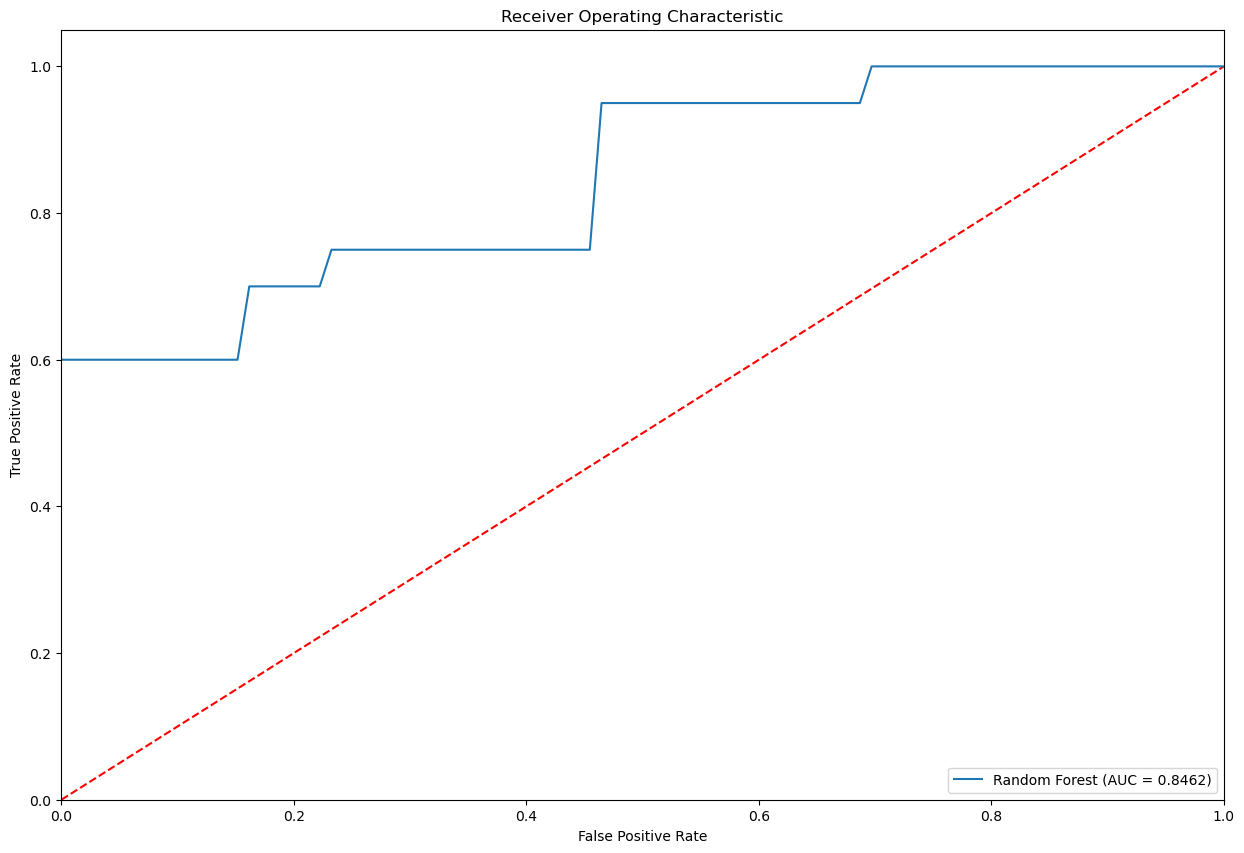

In [23]:
# ROC plot for max AUC

max_non_linear_index = rf_result.index(max(rf_result))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.plot(x_new, tpr_smooth, label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.legend(loc='lower right')
plt.plot()

[]

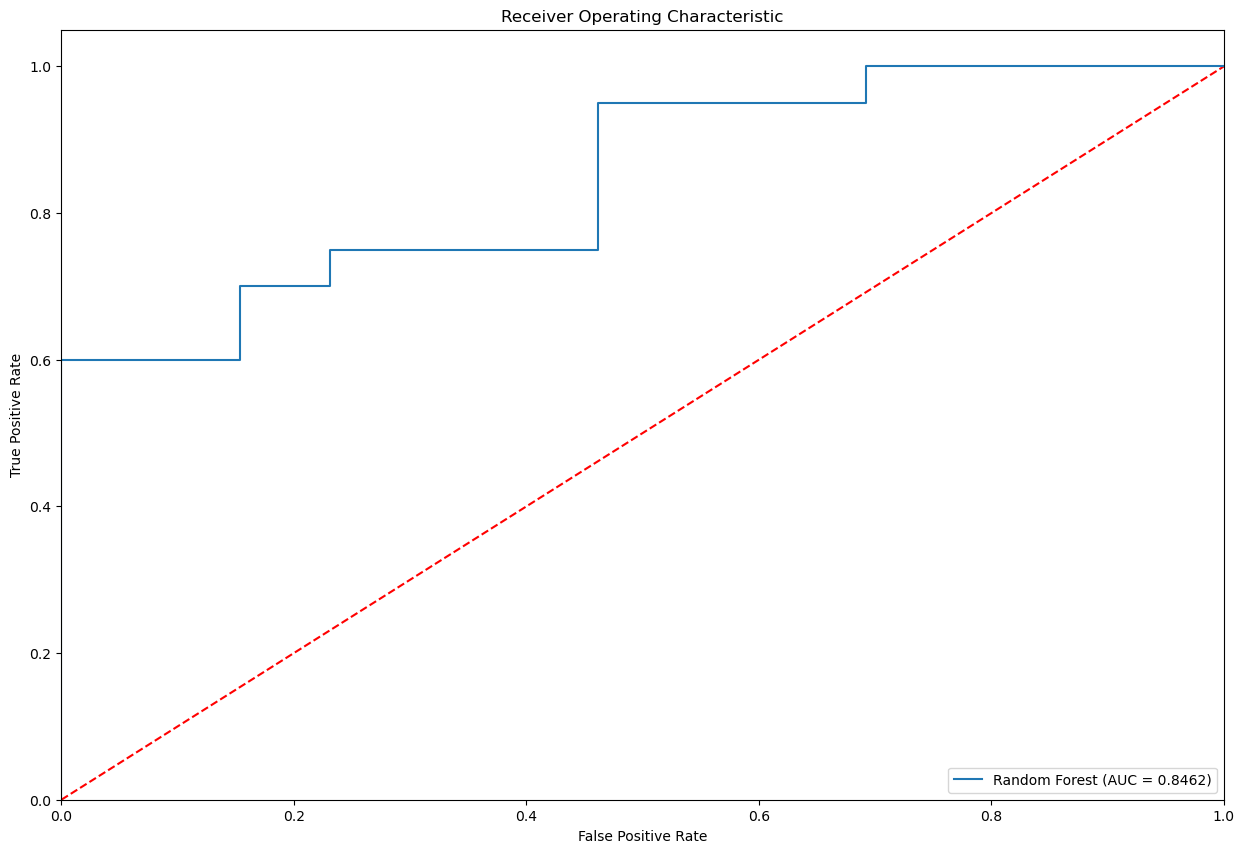

In [24]:
# ROC plot for max AUC

max_non_linear_index = rf_result.index(max(rf_result))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.plot(rf_fpr_1[max_non_linear_index], rf_tpr_1[max_non_linear_index], label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.legend(loc='lower right')
plt.plot()

Neural Network (using keras)

In [14]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


2024-06-20 11:22:57.381871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
def experiment(num):
    loss_results = []
    accuracy_results = []
    nn_auc_results = []
    threshold_results = []
    nn_fpr_results =[]
    nn_tpr_results = []
    for i in range(num):
        nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(8,)),  # input shape required
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
        ])

        opt=Adam(learning_rate=0.001)

        nn_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        nn = nn_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
        loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
        loss_results.append(loss)
        accuracy_results.append(accuracy)
        predictions = nn_model.predict(X_test)
        neuralNetworkAUC = metrics.roc_auc_score(y_test, nn_model.predict(X_test))
        nn_auc_results.append(neuralNetworkAUC)
        fpr_NN, tpr_NN, threshold = metrics.roc_curve(y_test, nn_model.predict(X_test))
        nn_fpr_results.append(fpr_NN)
        nn_tpr_results.append(tpr_NN)
        threshold_results.append(threshold)
    return loss_results, accuracy_results, nn_auc_results, threshold_results, nn_fpr_results, nn_tpr_results
#neural_network_AUC = metrics.roc_auc_score(y_test, nn.predict(X_test, batch_size=None, verbose=0)[:,1])
#fpr_nn, tpr_nn, threshold = metrics.roc_curve(y_test, nn.predict(X_test, batch_size=None, verbose=0)[:,1])


In [16]:
#call the function
loss_results, accuracy_results, nn_auc_results, threshold_results, nn_fpr_results, nn_tpr_results = experiment(100)


2/2 [==============================] - 0s 1ms/step


In [25]:
print(nn.history.keys())
# summarize history for accuracy
plt.plot(nn.history['accuracy'])
#plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn.history['loss'])
#plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'nn' is not defined

[]

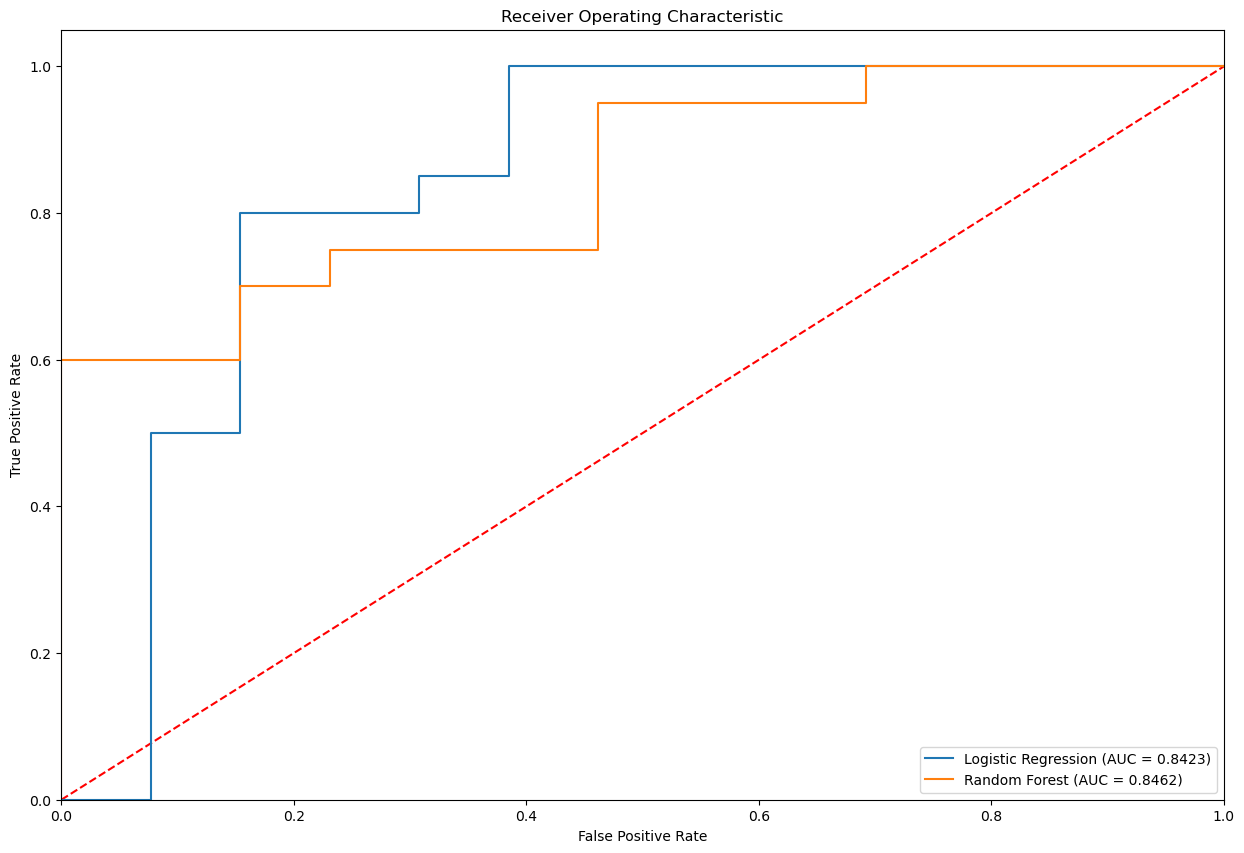

In [26]:
# ROC plot for max AUC Logistic and Random Forest
max_linear_index = logistic_regression_results.index(max(logistic_regression_results))
max_non_linear_index = rf_result.index(max(rf_result))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.plot(l_fpr[max_linear_index], l_tpr[max_linear_index], label='Logistic Regression (AUC = %0.4f)' % max(logistic_regression_results))
plt.plot(rf_fpr_1[max_non_linear_index], rf_tpr_1[max_non_linear_index], label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.legend(loc='lower right')
plt.plot()

[]

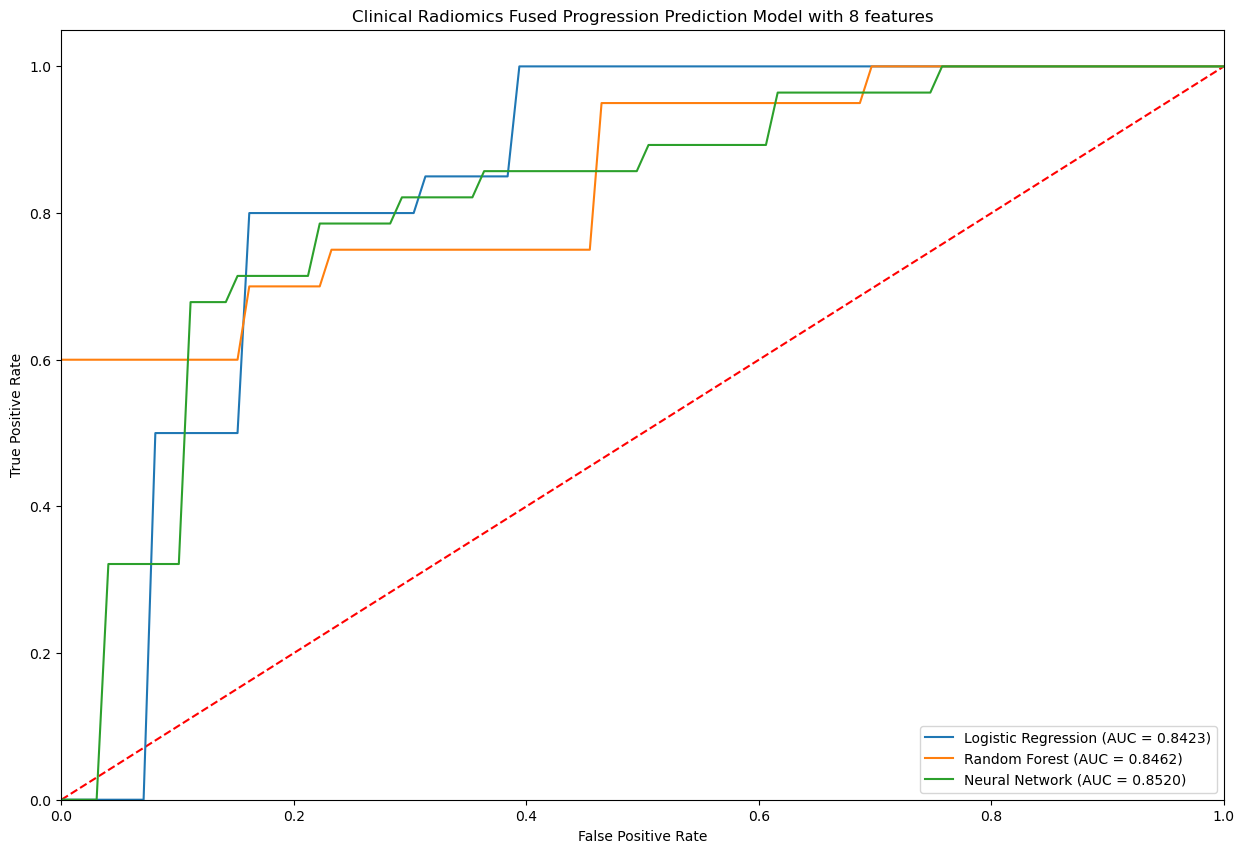

In [27]:
#Roc Auc Logistic and Random Forest Smooth
# ROC plot for max AUC Logistic and Random Forest
max_linear_index = logistic_regression_results.index(max(logistic_regression_results))
max_non_linear_index = rf_result.index(max(rf_result))
max_nn_index = nn_auc_results.index(max(nn_auc_results))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Clinical Radiomics Fused Progression Prediction Model with 8 features')
plt.plot(x_new, l_tpr_smooth, label='Logistic Regression (AUC = %0.4f)' % max(logistic_regression_results))
plt.plot(x_new, tpr_smooth, label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.plot(x_new, nn_tpr_smooth, label='Neural Network (AUC = %0.4f)' % max(nn_auc_results))
plt.legend(loc='lower right')
plt.plot()

In [20]:
print('average AUC for random forest is:', sum(rf_result)/len(rf_result))
print('Max AUC for random forest is:', max(rf_result))
print('average AUC for logistic regression is:', sum(logistic_regression_results)/len(logistic_regression_results))
print('Max AUC for logistic regression is:', max(logistic_regression_results))
print('average AUC for Neural Networks is:', sum(nn_auc_results)/len(nn_auc_results))
print('Max AUC for Neural Networks is:', max(nn_auc_results))

average AUC for random forest is: 0.8461538461538376
Max AUC for random forest is: 0.846153846153846
average AUC for logistic regression is: 0.8423076923077063
Max AUC for logistic regression is: 0.8423076923076923
average AUC for Neural Networks is: 0.7972257653061221
Max AUC for Neural Networks is: 0.8520408163265306
